# Traffic Data

In [39]:
# Lets import our traffic data

import geopandas as gpd
import pandas as pd
import numpy as np


traffic = gpd.read_file("../data/2023_Traffic_Volume.geojson")

Transform, clean, and reduce data down to exactly what we need:

- Remove unnecessary columns

In [40]:
print(traffic.columns)
traffic.count()

Index(['ROUTEID', 'FROMMEASURE', 'TOMEASURE', 'FROMDATE', 'TODATE', 'EVENTID',
       'AADT', 'AADT_YEAR', 'GIS_ID', 'OBJECTID', 'SHAPE', 'GLOBALID',
       'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'SHAPELEN', 'geometry'],
      dtype='object')


ROUTEID        9492
FROMMEASURE    9492
TOMEASURE      9492
FROMDATE       9492
TODATE         1119
EVENTID        9492
AADT           9492
AADT_YEAR      9492
GIS_ID            0
OBJECTID       9492
SHAPE             0
GLOBALID       9492
CREATOR        9492
CREATED        9492
EDITOR         9492
EDITED         9492
SHAPELEN       9492
geometry       9480
dtype: int64

In [41]:
traffic = traffic[
    ["ROUTEID", "AADT", "geometry"]
]

## Exporting our data

In [42]:
# export our cleaned traffic data for later use
traffic.to_file("../cleaned_data/traffic_data.geojson", driver="GeoJSON")

## Basic Visualization

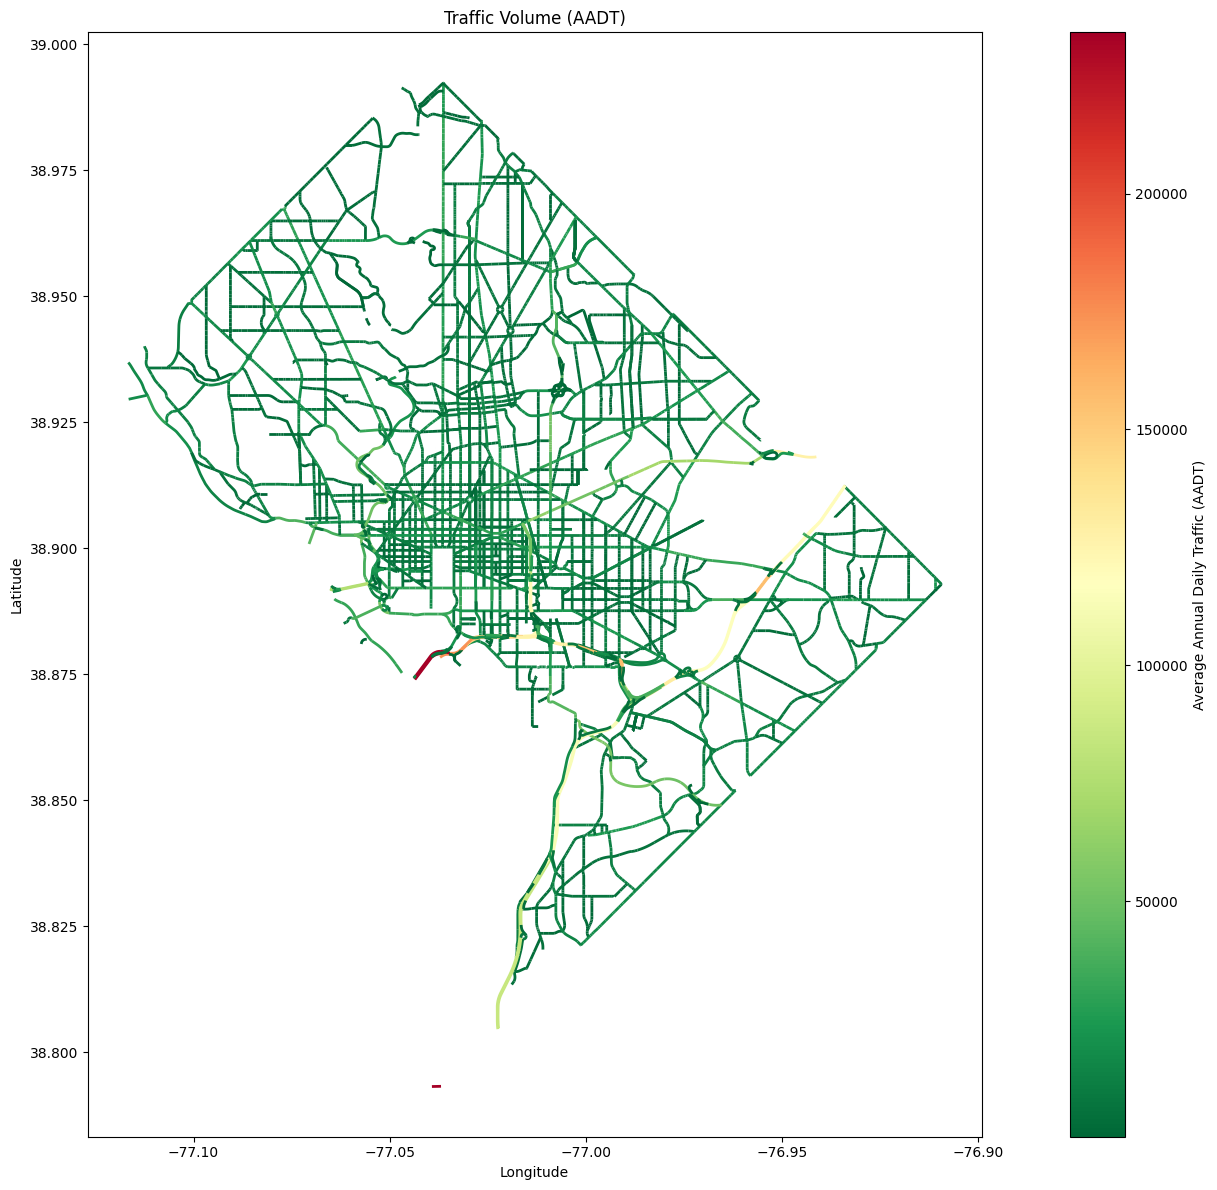

In [43]:
# using matplotlib, plot both aadt and length adjusted
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(18, 12))
traffic.plot(
    column="AADT",
    ax=ax,
    legend=True,
    cmap="RdYlGn_r",
    linewidth=2.0,
    legend_kwds={"label": "Average Annual Daily Traffic (AADT)", "orientation": "vertical"},
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Traffic Volume (AADT)")
plt.tight_layout()
plt.show()
